In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
os.chdir('..')

In [2]:
df = pd.read_csv("times.txt", sep=" ", header=None, names=["words", "times_fst", "times_bin"])
df['len'] = df['words'].str.len()
df.head()

,words,times_fst,times_bin,len
0,Galen',3,18,6
1,a,912,472,1
2,prim,15,5,4
3,s,1831,1328,1
4,ch,225,122,2


In [3]:
df.describe()

,times_fst,times_bin,len
count,10000.000000,10000.000000,10000.000000
mean,108.572800,57.799200,4.212800
std,251.026198,139.790611,2.605647
min,0.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000
50%,4.000000,3.000000,4.000000
75%,58.000000,29.000000,6.000000
max,2180.000000,1328.000000,16.000000


<Axes: xlabel='times_fst', ylabel='Count'>

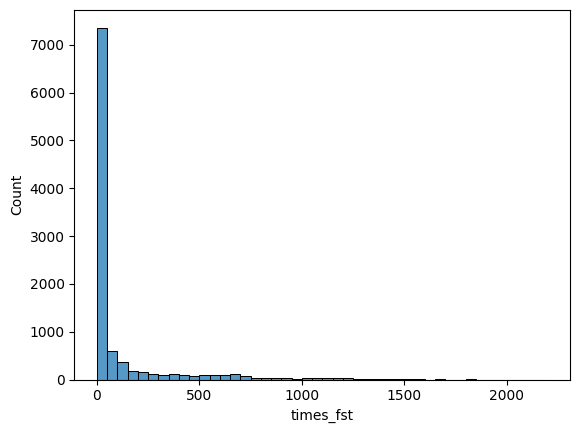

In [4]:
sns.histplot(df["times_fst"], binwidth=50)

<Axes: xlabel='times_bin', ylabel='Count'>

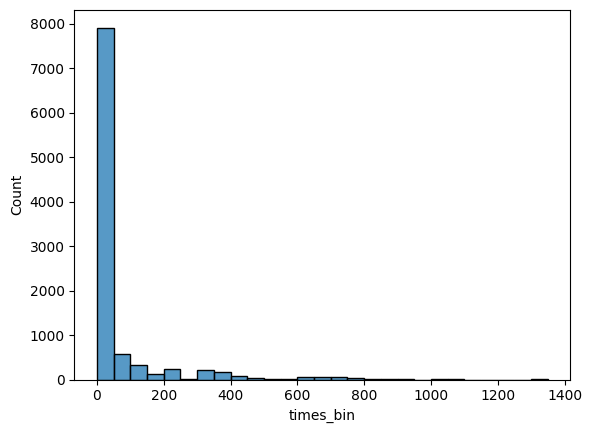

In [5]:
sns.histplot(df["times_bin"], binwidth=50)

In [6]:
df_by_len = df.groupby("len")[["times_fst", "times_bin"]].describe()
df_by_len

times_fst                                                               \
        count        mean         std   min     25%    50%     75%     max   
len                                                                          
1      1584.0  567.476641  363.550491  10.0  272.00  530.5  744.25  2180.0   
2      1546.0   94.333765   93.537171   0.0   34.00   68.0  113.00   550.0   
3      1482.0   16.920378   23.030124   0.0    4.00   10.0   20.00   239.0   
4      1355.0    5.346863    7.666853   0.0    2.00    3.0    6.00    73.0   
5      1198.0    2.717863    3.260948   0.0    1.00    2.0    3.00    57.0   
6       912.0    2.082237    1.483474   0.0    1.00    2.0    2.25    17.0   
7       720.0    1.831944    1.239512   0.0    1.00    2.0    2.00    18.0   
8       477.0    1.968553    1.502469   0.0    1.00    2.0    2.00    20.0   
9       333.0    1.744745    1.214004   0.0    1.00    2.0    2.00    16.0   
10      208.0    1.812500    1.307148   0.0    1.00    2.0    2.00    16.0   
11      100.0    1.590000    0.805223   0.0    1.00    1.5    2.00     4.0   
12       48.0    1.729167    0.983688   0.0    1.00    2.0    2.00     5.0   
13       15.0    2.000000    0.654654   1.0    2.00    2.0    2.00     3.0   
14       14.0    1.714286    0.825420   1.0    1.00    1.5    2.00     3.0   
15        4.0    2.000000    1.414214   1.0    1.00    1.5    2.50     4.0   
16        4.0    2.250000    1.258306   1.0    1.75    2.0    2.50     4.0   

    times_bin                                                             
        count        mean         std  min    25%    50%     75%     max  
len                                                                       
1      1584.0  301.351641  220.600251  5.0  113.0  251.5  386.25  1328.0  
2      1546.0   49.325356   49.396404  1.0   16.0   33.0   59.00   341.0  
3      1482.0    9.295547   11.889389  0.0    3.0    5.0   12.00   150.0  
4      1355.0    3.276753    3.830533  0.0    1.0    2.0    4.00    37.0  
5      1198.0    1.873957    1.746214  0.0    1.0    1.0    2.00    25.0  
6       912.0    1.538377    1.266237  0.0    1.0    1.0    2.00    18.0  
7       720.0    1.333333    0.630694  0.0    1.0    1.0    2.00     6.0  
8       477.0    1.387841    0.901970  0.0    1.0    1.0    2.00    17.0  
9       333.0    1.291291    0.528537  0.0    1.0    1.0    2.00     5.0  
10      208.0    1.269231    0.655424  0.0    1.0    1.0    1.00     7.0  
11      100.0    1.160000    0.394917  0.0    1.0    1.0    1.00     2.0  
12       48.0    1.166667    0.476393  0.0    1.0    1.0    1.00     3.0  
13       15.0    1.000000    0.000000  1.0    1.0    1.0    1.00     1.0  
14       14.0    1.214286    0.425815  1.0    1.0    1.0    1.00     2.0  
15        4.0    1.250000    0.500000  1.0    1.0    1.0    1.25     2.0  
16        4.0    1.250000    0.500000  1.0    1.0    1.0    1.25     2.0

In [7]:
df1 = df[["times_fst", "len"]]
df2 = df[["times_bin", "len"]]
df1.columns = ["times", "len"]
df2.columns = ["times", "len"]
df1["method"] = "fst"
df2["method"] = "bin"
#Vertical concat
df_concat = pd.concat([df1, df2], axis=0)

/tmp/ipykernel_16987/1809382971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["method"] = "fst"
/tmp/ipykernel_16987/1809382971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["method"] = "bin"


<Axes: xlabel='len'>

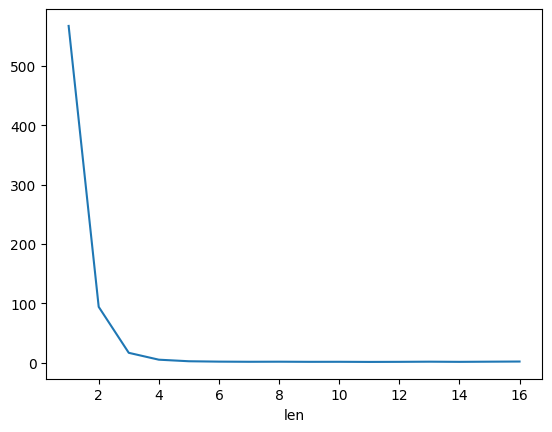

In [8]:
df_by_len["times_fst"]["mean"].plot()

<Axes: xlabel='len'>

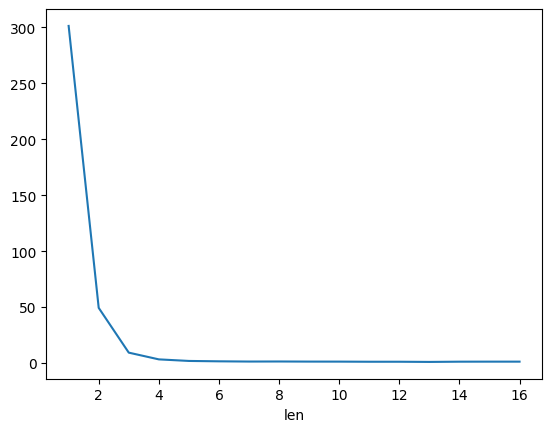

In [9]:
df_by_len["times_bin"]["mean"].plot()

/home/stelios/.virtualenvs/ita/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


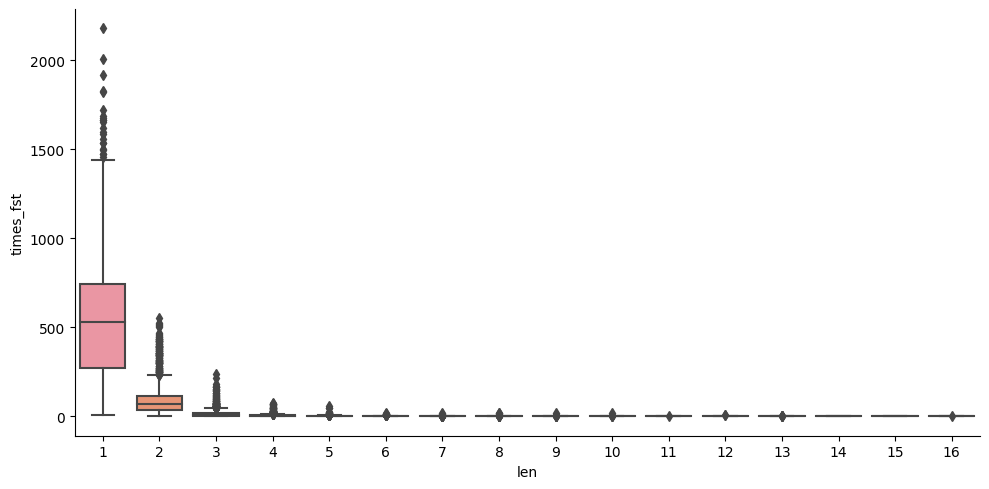

In [10]:
sns.catplot(x="len", y="times_fst", data=df, kind="box", aspect=2)

/home/stelios/.virtualenvs/ita/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


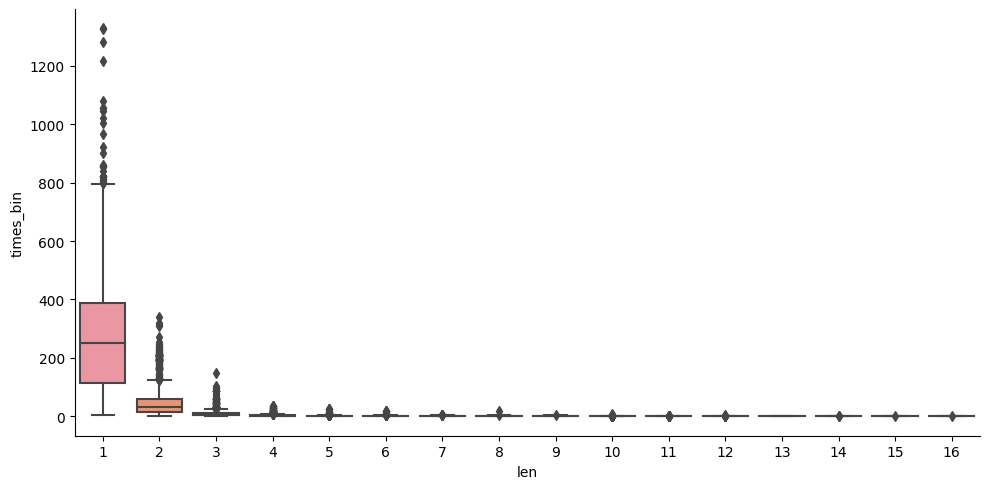

In [11]:
sns.catplot(x="len", y="times_bin", data=df, kind="box", aspect=2)

/home/stelios/.virtualenvs/ita/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


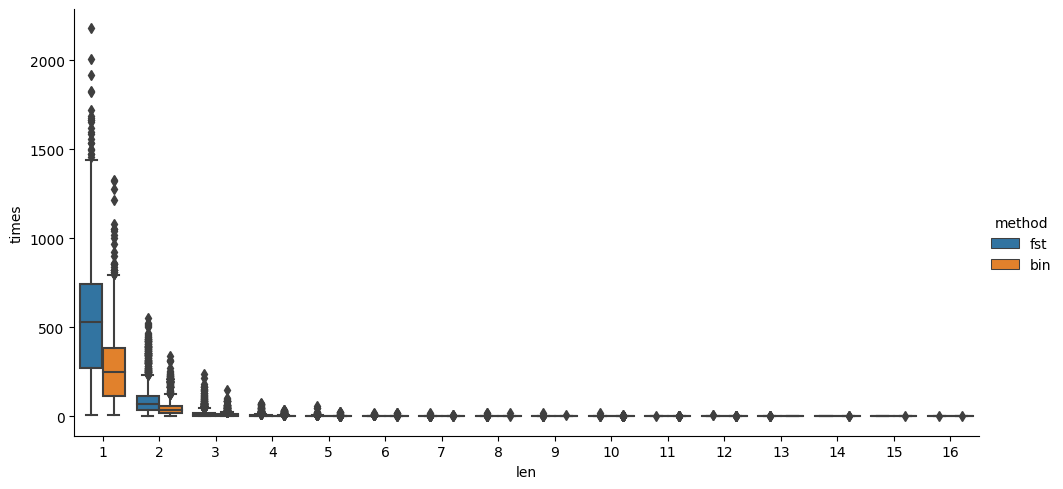

In [12]:
sns.catplot(x="len", y="times", data=df_concat, kind="box", aspect=2, hue="method")